# CSI 709/CSS 739 Verification and Validation of Models
## Week 4 - Code Examples
Dr. Hamdi Kavak

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sci

## 1. Confidence interval example

In [4]:
model_results = np.array([0.0336, 0.0917, 0.5263, 0.9046, 0.1147, 0.129, 0.1511, 0.3833, 0.1822, 0.309, 0.7896, 0.184, 0.2766, 0.6786, 0.2424, 0.3893, 0.1983, 0.7474, 0.5178, 0.2064, 0.2221, 0.2026, 0.2583, 0.5308, 0.6098, 0.7461, 0.9203, 0.5902, 0.4668, 0.3318, 0.631, 0.6757, 0.5382, 0.9946, 0.9265, 0.3785, 0.7001, 0.788, 0.3337, 0.3325, 0.9517, 0.7021, 0.577, 0.7444, 0.7531, 0.5508, 0.488, 0.3939, 0.3768, 0.5148, 0.8495, 0.3627, 0.7832, 0.4625, 0.6455, 0.5985, 0.2893, 0.3665, 0.1729, 0.9861, 0.5057, 0.7236, 0.2552, 0.1633, 0.6792, 0.0803, 0.5904, 0.4576, 0.7685, 0.662, 0.9451, 0.3007, 0.8844, 0.151, 0.2455, 0.4947, 0.3096, 0.0666, 0.794, 0.045, 0.2914, 0.8932, 0.8999, 0.7088, 0.495, 0.9458, 0.7739, 0.4957, 0.8593, 0.7942, 0.6136, 0.8434, 0.6929, 0.4602, 0.5103, 0.9496, 0.7033, 0.6691, 0.8904, 0.5645])

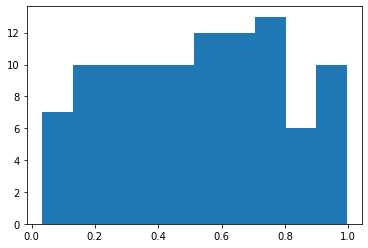

In [5]:
plt.hist(model_results)
plt.show()

In [7]:
m = np.mean(model_results)
st = np.std(model_results)
lb = m - 1.96*st
ub = m + 1.96*st

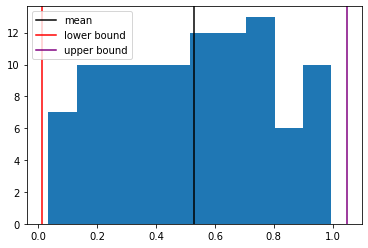

In [8]:
plt.hist(model_results)
plt.axvline(x=m, color='black', label='mean')
plt.axvline(x=lb, color='red', label='lower bound')
plt.axvline(x=ub, color='purple', label='upper bound')
plt.legend()
plt.show()


In [9]:
m = np.mean(model_results)
st = np.std(model_results)
lb = m - 1.645*st
ub = m + 1.645*st

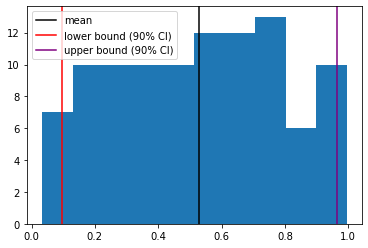

In [10]:
plt.hist(model_results)
plt.axvline(x=m, color='black', label='mean')
plt.axvline(x=lb, color='red', label='lower bound (90% CI)')
plt.axvline(x=ub, color='purple', label='upper bound (90% CI)')
plt.legend()
plt.show()


In [11]:
m = np.mean(model_results)
st = np.std(model_results)
lb = m - 1.282*st
ub = m + 1.282*st

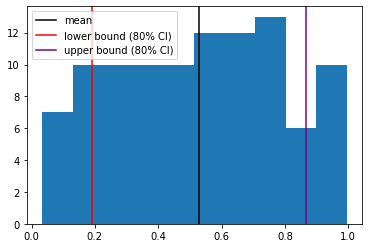

In [12]:
plt.hist(model_results)
plt.axvline(x=m, color='black', label='mean')
plt.axvline(x=lb, color='red', label='lower bound (80% CI)')
plt.axvline(x=ub, color='purple', label='upper bound (80% CI)')
plt.legend()
plt.show()


## 2. Generate random values

### 2.1. Let's make our own LCG random number generator

In [13]:
a = 321542534983524
m = 100
c = 11
x0 = 2023

x1 = (a * x0 + c) % m
x2 = (a * x1 + c) % m
x3 = (a * x2 + c) % m

print(x1, x2, x3)

63 23 63


In [14]:
a = 321542534983524
m = 100
c = 11
x = [2023]

for i in range(10):
    x_next = (a * x[-1] + c) % m
    x.append(x_next)

print(x)

[2023, 63, 23, 63, 23, 63, 23, 63, 23, 63, 23]


In [27]:
a = 25214903917
m = 2**48
c = 11
x = [2023]

for i in range(10000000):
    x_next = (a * x[-1] + c) % m
    x.append(x_next)

results = [xi/m for xi in x[1:]]

(array([ 999289.,  999694., 1001529.,  999781., 1000585.,  999624.,
         999703.,  998957., 1000836., 1000002.]),
 array([8.69397461e-08, 1.00000077e-01, 2.00000067e-01, 3.00000057e-01,
        4.00000047e-01, 5.00000037e-01, 6.00000027e-01, 7.00000017e-01,
        8.00000007e-01, 8.99999998e-01, 9.99999988e-01]),
 <BarContainer object of 10 artists>)

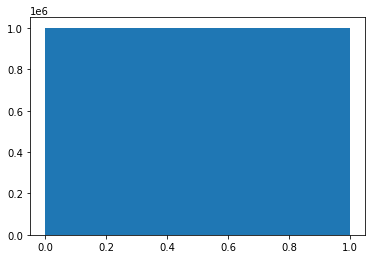

In [28]:
plt.hist(results)

### 2.1. Let's use Python's RNG

In [30]:
np.random.random() # 1 value between 0 and 1

0.6642093253137652

In [31]:
np.random.random(5) # 5 values between 0 and 1

array([0.20588129, 0.84033489, 0.08360385, 0.82552231, 0.67919244])

In [32]:
np.random.random((2,3)) # 2x3 matrix values between 0 and 1

array([[0.08288529, 0.87736841, 0.88576057],
       [0.55145288, 0.7387959 , 0.3534535 ]])

## 3. Sampling from statistical distributions 

In [34]:
np.random.uniform(0,10, size=10) # 10 uniform random number between 0 and 10

array([2.33258126, 4.28010511, 9.95474602, 7.80620188, 8.43958587,
       5.71000623, 7.46041027, 3.14079576, 6.53514977, 6.13734565])

In [35]:
np.random.normal(0, 5, size=10) # 10 normally distributed random numbers. mean=0, std dev=5

array([-3.14862876,  7.65772339, -0.52045064,  5.05367123, -0.97486066,
       -1.90817179,  8.29750175,  1.76687102,  5.17498906,  6.28410534])

In [36]:
np.random.poisson(10, size=10) # 10 poisson distributed random numbers. lambda=10

array([ 7, 13, 10, 13, 12,  7,  8,  8, 11, 10])

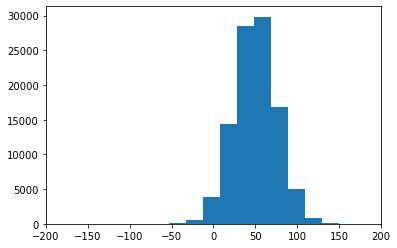

In [43]:
plt.hist(np.random.normal(50, 25, size=100000))
plt.xlim([-200,200])
plt.show()

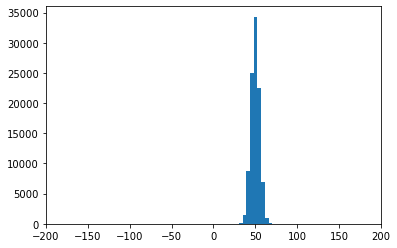

In [44]:
plt.hist(np.random.normal(50, 5, size=100000))
plt.xlim([-200,200])
plt.show()

## 4. Box and Whiskers plots

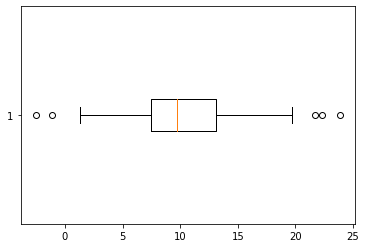

In [47]:
numbers = np.random.normal(10, 5, size=100)
plt.boxplot(numbers,vert=False)
plt.show()

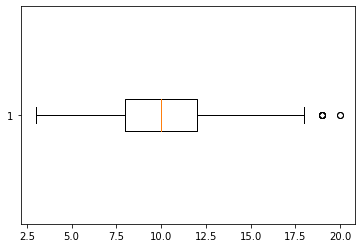

In [55]:
numbers = np.random.poisson(10,size=1000)
plt.boxplot(numbers,vert=False)
plt.show()

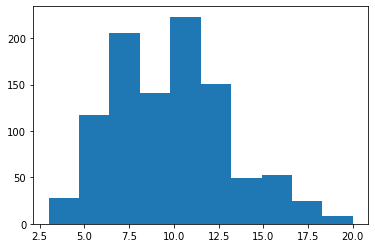

In [56]:
plt.hist(numbers);

## 5. Probability-Probability plots

In [ ]:
# generate 30 random number w/ mean=10, std dev=5
np.random.seed(2021)
n = 30
mean = 10
std = 5
sample_X = np.random.normal(mean,std,n)

In [ ]:
sample_X.sort()

In [ ]:
sample_X

In [ ]:
x = sci.norm.cdf(sample_X, loc=mean, scale=std)
y = (np.arange(1,n+1)-0.5)/n

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(np.linspace(0,1),np.linspace(0,1),'r',lw=2,label="y=x")
plt.scatter(x,y)
plt.xlabel('Theoretical prob.')
plt.ylabel('Observed prob.')
plt.title('Example P-P Plot')
plt.legend()
plt.savefig('qq.png', dpi=300)

In [ ]:
np.random.seed(2021)
n = 100
mean = 10
std = 5
sample_X = np.random.normal(mean,std,n)
sample_X.sort()
x = sci.norm.cdf(sample_X, loc=mean, scale=std)
y = (np.arange(1,n+1)-0.5)/n
plt.figure(figsize=(5,5))
plt.plot(np.linspace(0,1),np.linspace(0,1),'r',lw=2,label="y=x")
plt.scatter(x,y)
plt.xlabel('Theoretical prob.')
plt.ylabel('Observed prob.')
plt.title('Example P-P Plot (n='+str(n)+')')
plt.legend()
plt.savefig('qq_'+str(n)+'.png', dpi=300)

In [ ]:

np.random.seed(2021)
n = 1000
mean = 10
std = 5
sample_X = np.random.normal(mean,std,n)
sample_X.sort()
x = sci.norm.cdf(sample_X, loc=mean, scale=std)
y = (np.arange(1,n+1)-0.5)/n
plt.figure(figsize=(5,5))
plt.plot(np.linspace(0,1),np.linspace(0,1),'r',lw=2,label="y=x")
plt.scatter(x,y)
plt.xlabel('Theoretical prob.')
plt.ylabel('Observed prob.')
plt.title('Example P-P Plot (n='+str(n)+')')
plt.legend()
plt.savefig('qq_'+str(n)+'.png', dpi=300)

In [ ]:
np.random.seed(2021)
n = 500
mean = 0
std = 1
sample_X = np.random.uniform(0,1,n)
sample_X.sort()
x = sci.norm.cdf(sample_X, loc=mean, scale=std)
y = (np.arange(1,n+1)-0.5)/n
plt.figure(figsize=(5,5))
plt.plot(np.linspace(0,1),np.linspace(0,1),'r',lw=2,label="y=x")
plt.scatter(x,y)
plt.xlabel('Theoretical prob.')
plt.ylabel('Observed prob.')
plt.title('Example P-P Plot (n='+str(n)+')')
plt.legend()
plt.savefig('qq_uniform_to_normal_'+str(n)+'.png', dpi=300)

In [ ]:
np.random.seed(2021)
n = 500
mean = 0
std = 1
sample_X = np.random.beta(1,5,n)
sample_X.sort()
x = sci.norm.cdf(sample_X, loc=mean, scale=std)
y = (np.arange(1,n+1)-0.5)/n
plt.figure(figsize=(5,5))
plt.plot(np.linspace(0,1),np.linspace(0,1),'r',lw=2,label="y=x")
plt.scatter(x,y)
plt.xlabel('Theoretical prob.')
plt.ylabel('Observed prob.')
plt.title('Example P-P Plot (n='+str(n)+')')
plt.legend()
plt.savefig('qq_beta_to_normal_'+str(n)+'.png', dpi=300)

In [ ]:
np.random.seed(2021)
n = 1000
mean = 0
std = 10
sample_X = np.random.normal(mean,std,n)
sample_X.sort()
x = sci.norm.cdf(sample_X, loc=0, scale=1)
y = (np.arange(1,n+1)-0.5)/n
plt.figure(figsize=(5,5))
plt.plot(np.linspace(0,1),np.linspace(0,1),'r',lw=2,label="y=x")
plt.scatter(x,y)
plt.xlabel('Theoretical prob.')
plt.ylabel('Observed prob.')
plt.title('Example P-P Plot (n='+str(n)+')')
plt.legend()
plt.savefig('qq_n0,10-to-n0,1'+str(n)+'.png', dpi=300)